In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [19]:
#Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

#Split Data Train and Test
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV

#Modelling
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, plot_roc_curve

In [20]:
df = pd.read_csv('winequality-red.csv')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [22]:
df.shape

(1599, 12)

In [23]:
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [24]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [25]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

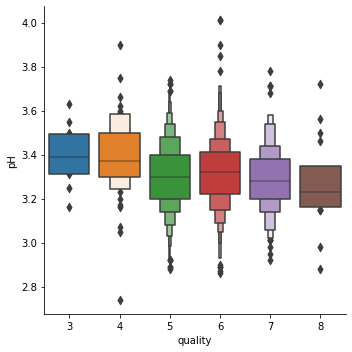

In [26]:
sns.catplot(data = df, x = 'quality', y = 'pH', kind= 'boxen')

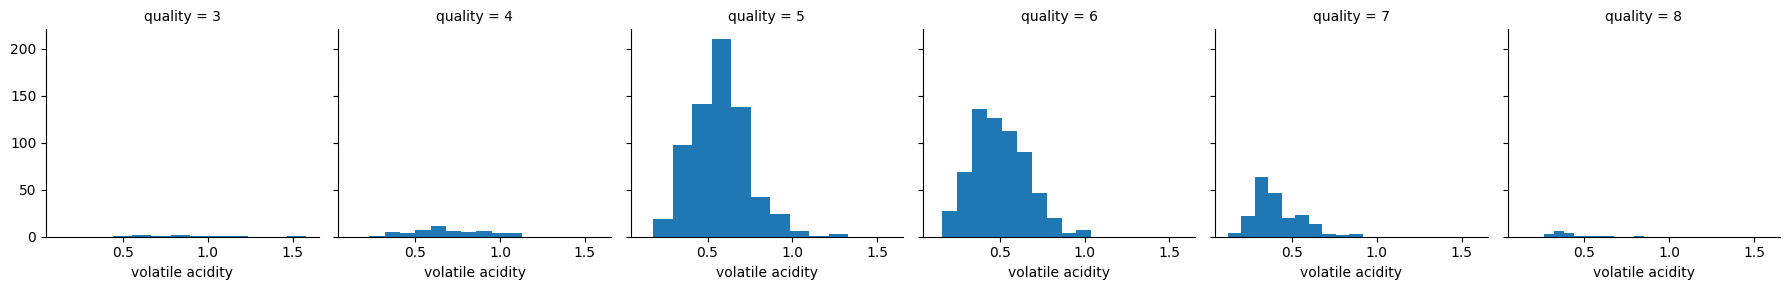

In [8]:
q = sns.FacetGrid(df, col = 'quality')
q.map(plt.hist, 'volatile acidity')

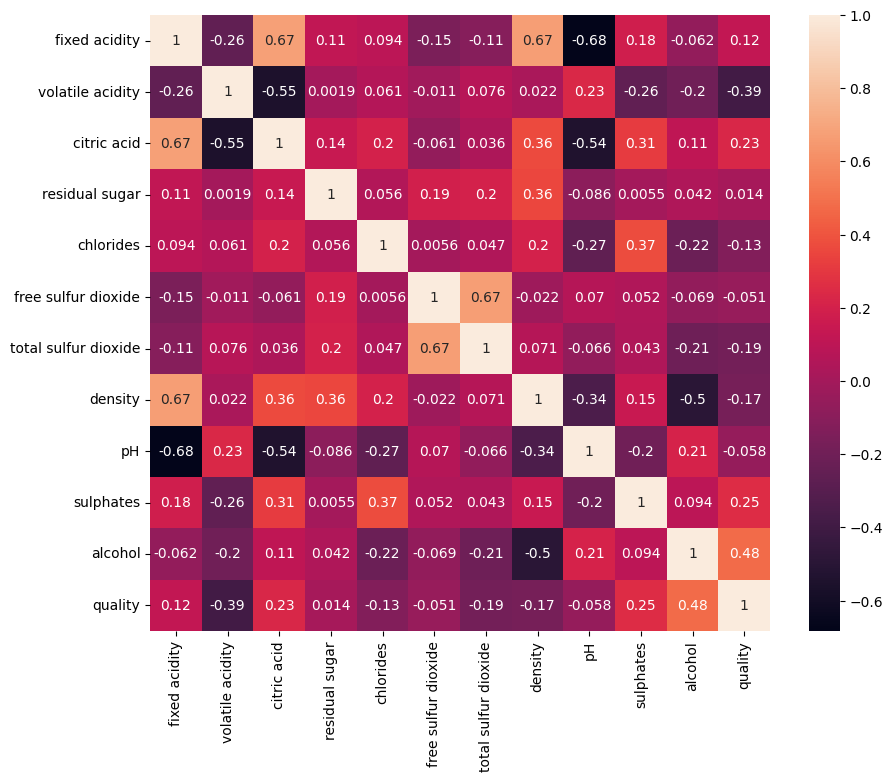

In [9]:
import matplotlib.pyplot as plt

import seaborn as sns
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)
plt.show()


<AxesSubplot: xlabel='alcohol', ylabel='Count'>

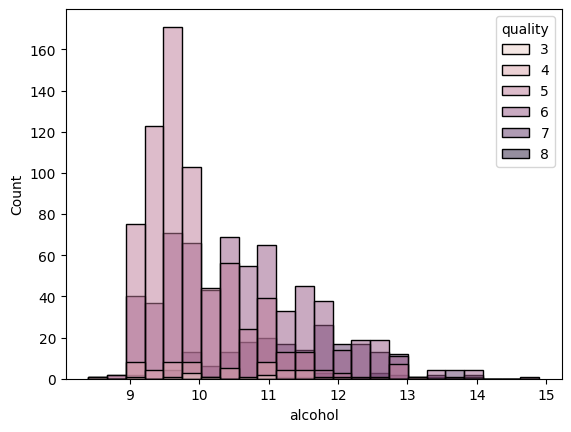

In [10]:
sns.histplot(data = df, x = 'alcohol', hue = 'quality')

In [27]:
q_med = df['quality'].median()
q_mean = df['quality'].mean()
q_mode = df['quality'].mode()

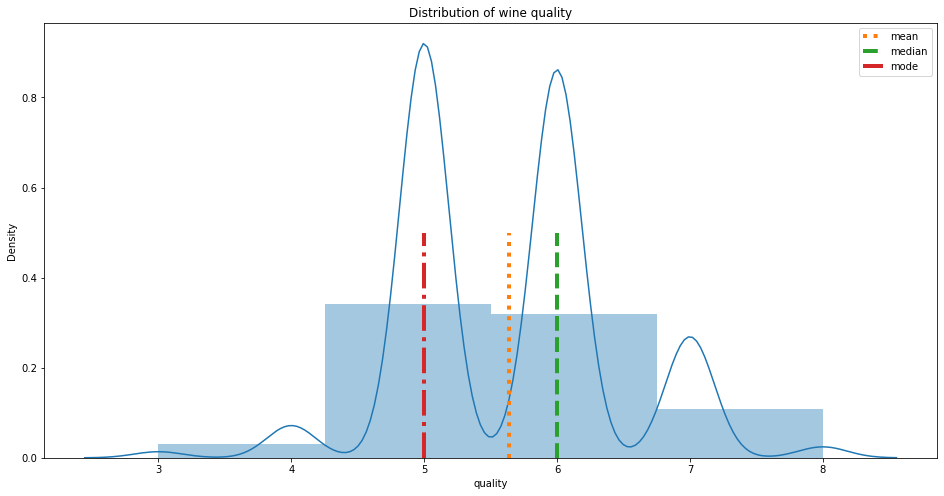

In [28]:
plt.figure(figsize = (16, 8))

sns.distplot(df['quality'], bins=4)

y = np.linspace(0, 0.5, 10)
plt.plot([q_mean] * 10, y, label='mean', linestyle=':', linewidth=4)
plt.plot([q_med] * 10, y, label='median', linestyle='--', linewidth=4)
plt.plot([q_mode] * 10, y, label='mode', linestyle='-.', linewidth=4)

plt.title('Distribution of wine quality')
plt.legend()
plt.show()

<AxesSubplot: xlabel='quality', ylabel='volatile acidity'>

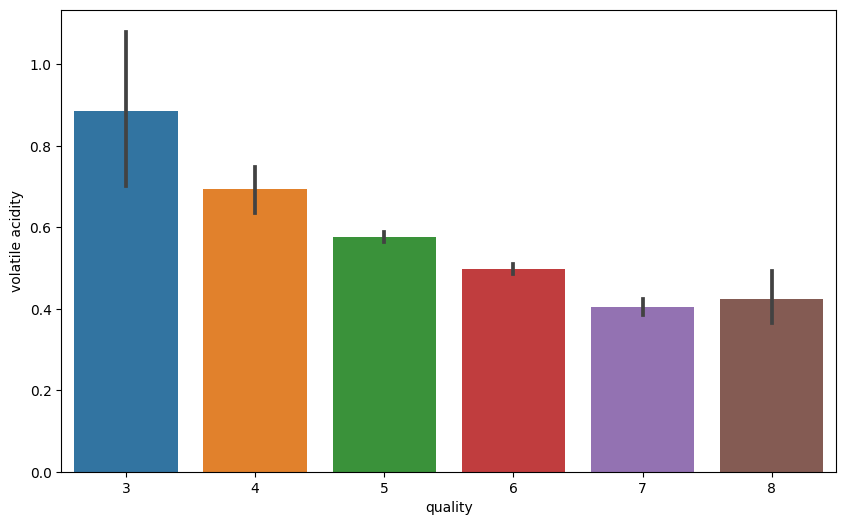

In [13]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'volatile acidity', data = df)

In [30]:
dt=df.copy()

In [31]:


dt.drop_duplicates(inplace=True)



In [32]:
#Standardization
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
dt.iloc[:,:-1]=std.fit_transform(dt.iloc[:,:-1]) #Standardize data set except dependent value(Quality feature)


In [33]:


#If quality value is less than or eqaul to 6 then it will be in class 0
#If quality value is greater than 6  then it will be in class 1
dt['quality'] = np.where(dt['quality'] > 6, 1, 0)
dt['quality'].value_counts()



0    1175
1     184
Name: quality, dtype: int64

In [34]:
#Assigning dataframe to list of array values
X=dt.iloc[:,:-1].values
Y=dt.iloc[:,-1].values


In [120]:


#Split the data set in the ratio of 80:20 
from sklearn.model_selection import train_test_split
X1=dt[['volatile acidity','alcohol','sulphates','citric acid']]
x_train, x_test, y_train, y_test = train_test_split(X1,Y,test_size = 0.2, random_state = 42)



# KNN

In [121]:
Corr=dt.corr()
Corr_res=[]
for i in range(0,len(dt.dtypes)):
    for j in range(0,len(dt.dtypes)):
        value=Corr.iloc[i:i+1,j:j+1].values
        if value>0.8 and value!=1 :
            Corr_res.append(Corr.columns[i])



Text(0, 0.5, 'Error Rate')

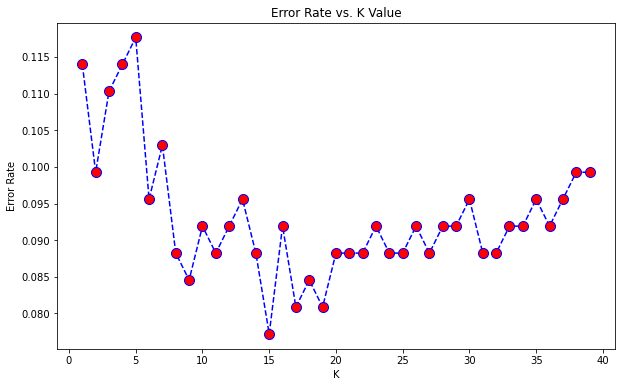

In [122]:
error_rate = []
for i in range(1, 40):
	
	knn = KNeighborsClassifier(n_neighbors = i)
	knn.fit(x_train, y_train)
	pred_i = knn.predict(x_test)
	error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize =(10, 6))
plt.plot(range(1, 40), error_rate, color ='blue',
				linestyle ='dashed', marker ='o',
		markerfacecolor ='red', markersize = 10)

plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')


In [123]:
#K=21 has lowest error rate
#Model Fit
classifier2 = KNeighborsClassifier(n_neighbors= 13, metric = 'manhattan', p = 2,weights='uniform')
classifier2.fit(x_train,y_train)


KNeighborsClassifier(metric='manhattan', n_neighbors=13)

In [124]:
#Predicting the ouput from input data (x_train) and (y_train) 
y_pred1 = classifier2.predict(x_train)
y_pred2 = classifier2.predict(x_test)


In [85]:
y_pred2

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0])

In [86]:


from sklearn.metrics import accuracy_score
print("Accuracy score of train data set:",accuracy_score(y_train, y_pred1))
print("Accuracy score of test data set:",accuracy_score(y_test, y_pred2))



Accuracy score of train data set: 0.8776448942042319
Accuracy score of test data set: 0.9117647058823529


In [125]:


k = range(1,50,2)
testing_accuracy = []
training_accuracy = []
score = 0
#Fitting the model
for i in k:
    knn = KNeighborsClassifier(n_neighbors = i)
    pipe_knn = Pipeline([('scale', MinMaxScaler()), ('knn', knn)])
    pipe_knn.fit(x_train, y_train)
    
    y_pred_train = pipe_knn.predict(x_train)
    training_accuracy.append(accuracy_score(y_train, y_pred_train))
    
    y_pred_test = pipe_knn.predict(x_test)
    acc_score = accuracy_score(y_test,y_pred_test)
    testing_accuracy.append(acc_score)
    
    if score < acc_score:
        score = acc_score
        best_k = i
        
print('Best Accuracy Score', score, 'Best K-Score', best_k)



Best Accuracy Score 0.9117647058823529 Best K-Score 9


In [126]:
confusion_matrix(y_test,y_pred_test)

array([[236,   2],
       [ 25,   9]], dtype=int64)

In [ ]:
#ROC Curve

In [48]:
from sklearn.metrics import roc_curve,auc

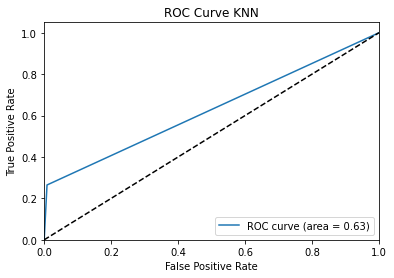

In [88]:
# ROC Curve

fpr,tpr,_=roc_curve(y_test,y_pred_test)
roc_auc=auc(fpr,tpr)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve KNN')
plt.legend(loc="lower right")
plt.show()

#Logistec Regression

In [52]:
#Logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, ConfusionMatrixDisplay

In [130]:
#instantiate the model
LogReg = LogisticRegression()

#fit the model using the training data
LogReg.fit(x_train, y_train)

#use model to make predictions on test data
y_pred = LogReg.predict(x_test)

In [131]:
LogReg_acc = accuracy_score(y_pred, y_test)
print("Test accuracy is : {:.2f}%".format(LogReg_acc * 100))

Test accuracy is : 88.97%


In [91]:
# #print classification report for model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       238
           1       0.67      0.24      0.35        34

    accuracy                           0.89       272
   macro avg       0.78      0.61      0.64       272
weighted avg       0.87      0.89      0.87       272



TrueNegative:  234
FalseNegative:  26
TruePositive:  8
FalsePositive:  4


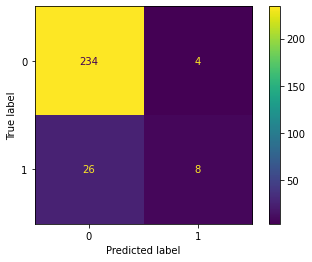

In [92]:
cfm = confusion_matrix(y_test, y_pred, labels=LogReg.classes_)
cfm_disp = ConfusionMatrixDisplay(confusion_matrix=cfm, display_labels=LogReg.classes_)
cfm_disp.plot()

print("TrueNegative: ", cfm[0][0])
print("FalseNegative: ", cfm[1][0])
print("TruePositive: ", cfm[1][1])
print("FalsePositive: ", cfm[0][1])


In [133]:
y_pred

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

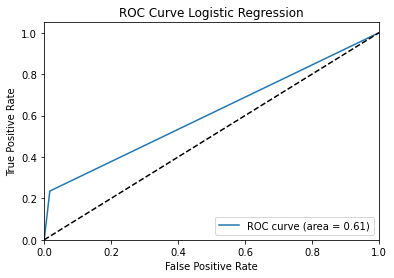

In [93]:
# ROC Curve

#Transform into continuos output
fpr,tpr,_=roc_curve(y_test,y_pred)
roc_auc=auc(fpr,tpr)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Logistic Regression')
plt.legend(loc="lower right")
plt.show()

In [32]:
#Logistic Regression
X1=dt[['volatile acidity','alcohol','sulphates','citric acid']]
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
score5=cross_val_score(LR,X,Y,cv=5)
score10=cross_val_score(LR,X,Y,cv=10)

print('Score mean5:' ,score5.mean())
print('Score mean10:' ,score10.mean())

Score mean5: 0.8631538962448448
Score mean10: 0.8727124183006536


#Tree

In [58]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [94]:
# Split the data into training and testing data
x_train, x_test, y_train, y_test = train_test_split(X1,Y,test_size=0.3)

In [95]:


# Create a Decision Tree
dt_basic = DecisionTreeClassifier(max_depth=10)
# Fit the training data
dt_basic.fit(x_train,y_train)
# Predict based on test data
y_preds = dt_basic.predict(x_test)



In [96]:
from sklearn import metrics
# Calculate Accuracy
accuracy_value = metrics.accuracy_score(y_test,y_preds)
accuracy_value



0.8676470588235294

In [97]:
# Create and print confusion matrix
confusion_matrix(y_test,y_preds)

array([[336,  23],
       [ 31,  18]], dtype=int64)

In [98]:
print(classification_report(y_test,y_preds))


              precision    recall  f1-score   support

           0       0.92      0.94      0.93       359
           1       0.44      0.37      0.40        49

    accuracy                           0.87       408
   macro avg       0.68      0.65      0.66       408
weighted avg       0.86      0.87      0.86       408



In [99]:
dt_basic.tree_.node_count

217

In [100]:
# Create a Parameter grid
param_grid = {
    'max_depth' : range(4,20,4),
    'min_samples_leaf' : range(20,200,40),
    'min_samples_split' : range(20,200,40),
    'criterion' : ['gini','entropy'] 
}
n_folds = 5


In [101]:


dtree = DecisionTreeClassifier()
grid = GridSearchCV(dtree, param_grid, cv = n_folds, n_jobs = -1,return_train_score=True)



In [102]:


grid.fit(x_train,y_train)



GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(4, 20, 4),
                         'min_samples_leaf': range(20, 200, 40),
                         'min_samples_split': range(20, 200, 40)},
             return_train_score=True)

In [103]:
grid.best_params_


{'criterion': 'entropy',
 'max_depth': 4,
 'min_samples_leaf': 20,
 'min_samples_split': 100}

In [104]:


grid.best_score_



0.8780325158445852

In [105]:


best_grid = grid.best_estimator_
best_grid



DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=20,
                       min_samples_split=100)

In [106]:


best_grid.fit(x_train,y_train)



DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=20,
                       min_samples_split=100)

In [107]:
y_preds = best_grid.predict(x_test)


In [108]:


# Calculate Accuracy
accuracy_value = metrics.accuracy_score(y_test,y_preds)
accuracy_value



0.8897058823529411

In [109]:


# Create and print confusion matrix
confusion_matrix(y_test,y_preds)



array([[347,  12],
       [ 33,  16]], dtype=int64)

In [110]:


print(classification_report(y_test,y_preds))



              precision    recall  f1-score   support

           0       0.91      0.97      0.94       359
           1       0.57      0.33      0.42        49

    accuracy                           0.89       408
   macro avg       0.74      0.65      0.68       408
weighted avg       0.87      0.89      0.88       408



In [2]:
# ROC Curve

# fpr,tpr,_=roc_curve(y_test,y_preds)
# roc_auc=auc(fpr,tpr)
# plt.figure()
# plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
# plt.plot([0, 1], [0, 1], 'k--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC Curve Tree')
# plt.show()

In [113]:
# train a Gaussian Naive Bayes classifier on the training set
from sklearn.naive_bayes import GaussianNB


# instantiate the model
gnb = GaussianNB()


# fit the model
gnb.fit(x_train, y_train)

GaussianNB()

In [114]:
y_pred = gnb.predict(x_test)

y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,

In [53]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.8775


In [115]:
y_pred_train = gnb.predict(x_train)

y_pred_train

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [55]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.8633


In [56]:
#checking for overfitting and underfitting
print('Training set score: {:.4f}'.format(gnb.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(gnb.score(x_test, y_test)))

Training set score: 0.8633
Test set score: 0.8775


In [57]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])


Confusion matrix

 [[332  26]
 [ 24  26]]

True Positives(TP) =  332

True Negatives(TN) =  26

False Positives(FP) =  26

False Negatives(FN) =  24


<AxesSubplot: >

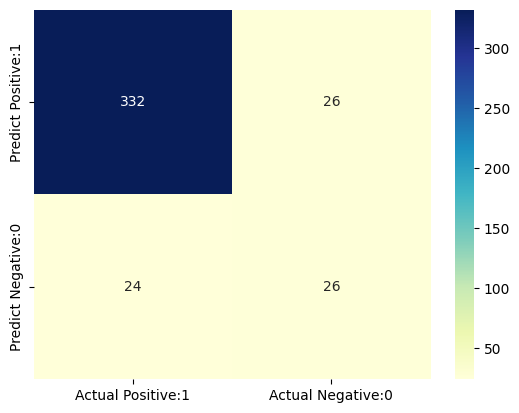

In [58]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [3]:
# ROC Curve

# fpr,tpr,_=roc_curve(y_test,y_pred)
# roc_auc=auc(fpr,tpr)
# plt.figure()
# plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
# plt.plot([0, 1], [0, 1], 'k--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC Curve Naive Bayes')
# plt.show()

In [59]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       358
           1       0.50      0.52      0.51        50

    accuracy                           0.88       408
   macro avg       0.72      0.72      0.72       408
weighted avg       0.88      0.88      0.88       408



In [60]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

scores = cross_val_score(DecisionTreeClassifier(), X, Y, cv=5)
scores

array([0.875     , 0.76470588, 0.83455882, 0.77573529, 0.84132841])

In [61]:
scores.mean()

0.8182656826568266

In [62]:
from sklearn.ensemble import BaggingClassifier

bag_model = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(), 
    n_estimators=100, 
    max_samples=0.8, 
    oob_score=True,
    random_state=0
)
bag_model.fit(x_train, y_train)
bag_model.oob_score_

0.8643533123028391

In [63]:
bag_model.fit(x_test, y_test)
bag_model.oob_score_

0.8921568627450981

# Performance Evaluation

In [ ]:
# Balanced Error Rate

In [127]:
# KNN

a=236
b=2
c=25
d=9

BER_KNN=0.5*(b/(a+b) + c/(c+d))
BER_KNN

0.37184873949579833

In [9]:
#LR

a=234
c=26
d=8
b=4

BER_LR=0.5*(b/(a+b) + c/(c+d))
BER_LR

0.3907563025210084

In [10]:
#Tree

a=339
b=19
c=37
d=13

BER_Tree=0.5*(b/(a+b) + c/(c+d))
BER_Tree

0.396536312849162

In [11]:
#NB

a=332
b=26
c=24
d=26

BER_NB=0.5*(b/(a+b) + c/(c+d))
BER_NB

0.27631284916201115